In [1]:
import json 

with open('data3.json','r') as file :
    data = json.load(file)

In [2]:
import pandas as pd 

data = pd.DataFrame(
    data=data, columns=["brand","watch_short_description","watch_price","watch_mrp","watch_offer","watch_rating","watch_num_rating","total_product_rating","watch_detail","comments"]
)

In [3]:
comments = data.comments

In [4]:
data_comments = []
for comments in data.comments:
    if comments:
        for comment in comments:
            if comment:
                data_comments.append(comment)

In [5]:
comments_data = pd.DataFrame(data_comments, columns=['customer_rating','customer_review','customer_place','customer_name_date'])

In [6]:
comments_data.shape

(8983, 4)

In [7]:
# clean customer ratings 
comments_data.customer_rating = comments_data.customer_rating.apply(lambda x : float(x.strip()))

In [8]:
# customer place extraction 
comments_data.customer_place = comments_data.customer_place.apply( lambda x : place[1].strip() if len(place := x.split(',')) ==2  else None)

In [9]:
import matplotlib.pyplot as plt 

In [10]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

Text(0.5, 1.0, 'Top cities with high ordes')

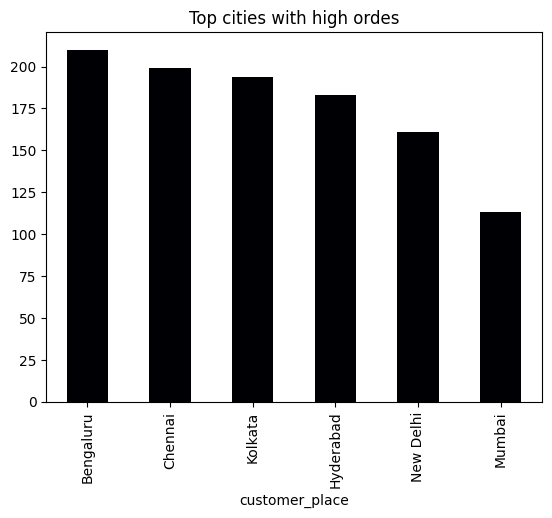

In [11]:
comments_data.customer_place.value_counts()[:6].plot(kind='bar',colormap='magma')# top five cities of highes order
plt.title('Top cities with high ordes') 

In [12]:
[x.strip()  for x in comments_data.customer_name_date[1].replace('\n','').split('    ') if x]

['Bismi  Kamal', 'Jan, 2020', '438', '83', 'Permalink', 'Report Abuse', '']

In [13]:
comments_data['customer_name'] = comments_data.customer_name_date.apply(lambda x : [x.strip()  for x in x.replace('\n','').split('  ') if x][0])
comments_data['customer_order_date']=comments_data.customer_name_date.apply(lambda x : [x.strip()  for x in x.replace('\n','').split('    ') if x][1])
        


In [14]:
comments_data.isnull().sum()

customer_rating         0
customer_review         0
customer_place         51
customer_name_date      0
customer_name           0
customer_order_date     0
dtype: int64

In [15]:
comments_data.to_csv('clean_watch_comments.csv',index_label=False, index=False)

In [16]:
comments_data = pd.read_csv('clean_watch_comments.csv')
comments_data.columns

Index(['customer_rating', 'customer_review', 'customer_place',
       'customer_name_date', 'customer_name', 'customer_order_date'],
      dtype='object')

In [17]:
comments_data.head()

,customer_rating,customer_review,customer_place,customer_name_date,customer_name,customer_order_date
0,5.0,\n too good quality and classic...,Jhunjhunun,\n\n Ameer Shekh\n ...,Ameer Shekh,"Nov, 2019"
1,5.0,\n excellent\n,Kulathummal,\n\n Bismi Kamal\n ...,Bismi,"Jan, 2020"
2,5.0,\n Watch is awesome👏✊👍. Absolut...,Haldwani,\n\n Flipkart Customer\n ...,Flipkart Customer,"Oct, 2019"
3,5.0,\n It is excellent watch\n ...,Purbi Singhbhum District,\n\n Jhulan Halder\n ...,Jhulan Halder,"May, 2018"
4,5.0,\n Nice watch at a budget price...,Rewa District,\n\n Anshuman Payasi\n ...,Anshuman Payasi,"Apr, 2018"


In [18]:
data.shape

(14, 10)